## ARIMA and SARIMA Forecasting

### ARIMA Modeling and Forecasting

ARIMA (AutoRegressive Integrated Moving Average) forecasting is a time series forecasting method that combines autoregressive (AR), differencing (I), and moving average (MA) components to model and predict future values of a time series.

Here's a brief overview of each component:

1. **AutoRegressive (AR) Component:** This component models the relationship between an observation and a fixed number of lagged observations. The term "autoregressive" indicates that the model is regressing the variable on its own lagged values.

2. **Integrated (I) Component:** This component involves differencing the time series to make it stationary, which means removing any trend or seasonality present in the data. The differencing order (denoted by "d") specifies how many times the data is differenced to achieve stationarity.

3. **Moving Average (MA) Component:** This component models the relationship between an observation and a residual error term based on a moving average of past errors. The term "moving average" refers to the averaging of past error terms in the model.

The ARIMA model is denoted as ARIMA `(p, d, q)`, where:

- `p` represents the order of the autoregressive component (AR).
- `d` represents the degree of differencing needed to make the series stationary.
- `q` represents the order of the moving average component (MA).

The ARIMA model captures time series patterns, including trend, seasonality, and other temporal dependencies. We use the differenced data for the analysis and pass `ARIMA(p, 0, q)`, however, it is first degree differenced. 

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
# Retrieving data from the `data` folder created during the analysis
chn_df = pd.read_csv('data/china_finalm.csv', index_col = 'Unnamed: 0')
ind_df = pd.read_csv('data/ind_finalm.csv', index_col = 'Unnamed: 0')
japan_df = pd.read_csv('data/japan_finalm.csv', index_col = 'Unnamed: 0')
euro_df = pd.read_csv('data/euro_finalm.csv', index_col = 'Unnamed: 0')
uk_df = pd.read_csv('data/uk_finalm.csv', index_col = 'Unnamed: 0')

#### Data Literacy

- The dataset consists of the actual exchange rate and the first degree differenced data. 
- We consider the differenced data for modeling and prediction.
- The actual dataset consists of exchange rates till `January 2024`. We split this data into train and test sets for modeling, prediction, forecasting.
- The forecsting is done on the whole dataset and forcasts exchange rate for the next 11 months, i.e., till `November 2024`.
- This allows us to compare the forecasted exchange rates from `February 2024` to `June 2024` and understand how different models are performing.

## Splitting Dataset

Split the dataset into train and test sets 

In [3]:
split_index = int(0.9 * len(euro_df))
euro_train = euro_df['Differenced_Data'].iloc[:split_index]
euro_test = euro_df['Differenced_Data'].iloc[split_index:]

In [4]:
split_index = int(0.9 * len(uk_df))
uk_train = uk_df['Differenced_Data'].iloc[:split_index]
uk_test = uk_df['Differenced_Data'].iloc[split_index:]

In [5]:
split_index = int(0.9 * len(ind_df))
ind_train = ind_df['Differenced_Data'].iloc[:split_index]
ind_test = ind_df['Differenced_Data'].iloc[split_index:]

In [6]:
split_index = int(0.9 * len(japan_df))
japan_train = japan_df['Differenced_Data'].iloc[:split_index]
japan_test = japan_df['Differenced_Data'].iloc[split_index:]

In [7]:
split_index = int(0.9 * len(chn_df))
chn_train = chn_df['Differenced_Data'].iloc[:split_index]
chn_test = chn_df['Differenced_Data'].iloc[split_index:]

### Training ARIMA model

In [8]:
from statsmodels.tsa.arima.model import ARIMA

##### ARIMA Parameters from ACF and PACF

**Euro**: `p = 4`, `q = 1`

**GBP**: `p = 1`, `q = 1`

**INR**: `p = 9`, `q = 9`

**JPY**: `p = 1`, `q = 1`

**CHY**: `p = 2`, `q = 1`

In [9]:
warnings.filterwarnings('ignore')

In [10]:
start = len(euro_train)
end = len(euro_train) + len(euro_test) - 1

In [11]:
euro_model = ARIMA(euro_train, order=(4,0,1))
euro_model_fit = euro_model.fit()
euro_pred = euro_model_fit.predict(start, end)
print(euro_pred)

2023-02-01   -0.002159
2023-03-01   -0.000971
2023-04-01   -0.002302
2023-05-01   -0.001495
2023-06-01    0.000327
2023-07-01    0.001142
2023-08-01    0.001235
2023-09-01    0.001212
2023-10-01    0.001363
2023-11-01    0.001491
2023-12-01    0.001552
2024-01-01    0.001556
Freq: MS, Name: predicted_mean, dtype: float64


In [12]:
uk_model = ARIMA(uk_train, order=(1,0,1))
uk_model_fit = uk_model.fit()
uk_pred = uk_model_fit.predict(start, end)
print(uk_pred)

2023-02-01   -0.000700
2023-03-01    0.000856
2023-04-01    0.001475
2023-05-01    0.001720
2023-06-01    0.001818
2023-07-01    0.001857
2023-08-01    0.001872
2023-09-01    0.001878
2023-10-01    0.001881
2023-11-01    0.001882
2023-12-01    0.001882
2024-01-01    0.001882
Freq: MS, Name: predicted_mean, dtype: float64


In [13]:
ind_model = ARIMA(ind_train, order=(9,0,9))
ind_model_fit = ind_model.fit()
ind_pred = ind_model_fit.predict(start, end)
print(ind_pred)

2023-02-01   -0.716965
2023-03-01   -0.345038
2023-04-01   -0.807136
2023-05-01    0.242937
2023-06-01   -0.041018
2023-07-01   -0.951387
2023-08-01   -0.015706
2023-09-01   -0.335970
2023-10-01   -0.105932
2023-11-01    0.008962
2023-12-01    0.047331
2024-01-01    0.824257
Freq: MS, Name: predicted_mean, dtype: float64


In [14]:
japan_model = ARIMA(japan_train, order=(1,0,1))
japan_model_fit = japan_model.fit()
japan_pred = japan_model_fit.predict(start, end)
print(japan_pred)

2023-02-01   -1.495862
2023-03-01   -0.404549
2023-04-01   -0.010412
2023-05-01    0.131933
2023-06-01    0.183342
2023-07-01    0.201909
2023-08-01    0.208615
2023-09-01    0.211037
2023-10-01    0.211911
2023-11-01    0.212227
2023-12-01    0.212341
2024-01-01    0.212382
Freq: MS, Name: predicted_mean, dtype: float64


In [15]:
chn_model = ARIMA(chn_train, order=(2,0,1))
chn_model_fit = chn_model.fit()
chn_pred = chn_model_fit.predict(start, end)
print(chn_pred)

2023-02-01    0.001665
2023-03-01    0.000197
2023-04-01   -0.000483
2023-05-01   -0.000624
2023-06-01   -0.000512
2023-07-01   -0.000344
2023-08-01   -0.000216
2023-09-01   -0.000148
2023-10-01   -0.000127
2023-11-01   -0.000131
2023-12-01   -0.000144
2024-01-01   -0.000155
Freq: MS, Name: predicted_mean, dtype: float64


#### Visualizating the Model Predictions

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

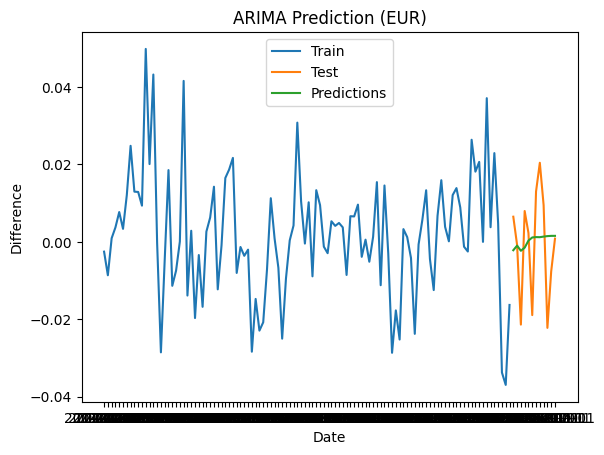

In [17]:
euro_pred_df = pd.DataFrame(euro_pred)
euro_pred_df.index = euro_pred_df.index.astype(str)
plt.plot(euro_train, label='Train')
plt.plot(euro_test, label='Test')
plt.plot(euro_pred_df, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('ARIMA Prediction (EUR)')
plt.legend()
plt.show()

In [18]:
mae_euro = mean_absolute_error(euro_test, euro_pred_df)
mse_euro = mean_squared_error(euro_test, euro_pred_df)
rmse_euro = np.sqrt(mean_squared_error(euro_test, euro_pred_df))
euro_perf = {'Currency':'Euro','MAE': mae_euro, 'MSE': mse_euro,
'RMSE': rmse_euro}
euro_perf = pd.DataFrame([euro_perf])
euro_perf

,Currency,MAE,MSE,RMSE
0,Euro,0.011013,0.00018,0.013405


#### Interpretation

<b>From Plot:</b> We observe that the model captures some of the trend, however, the actual observations (test) is varying not as expected by the predicted observations.

<b>From Performance Metrics</b>: The error values are all very small `(RMSE < 0.1)`, indicating that the model successfully captured the trend in the dataset and is reliable.

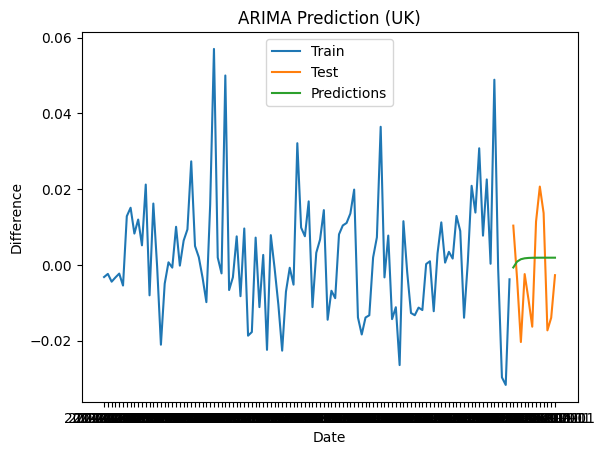

In [19]:
uk_pred_df = pd.DataFrame(uk_pred)
uk_pred_df.index = uk_pred_df.index.astype(str)
plt.plot(uk_train, label='Train')
plt.plot(uk_test, label='Test')
plt.plot(uk_pred_df, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('ARIMA Prediction (UK)')
plt.legend()
plt.show()

In [20]:
mae_uk = mean_absolute_error(uk_test, uk_pred_df)
mse_uk = mean_squared_error(uk_test, uk_pred_df)
rmse_uk = np.sqrt(mean_squared_error(uk_test, uk_pred_df))
uk_perf = {'Currency':'UK Pound','MAE': mae_uk, 'MSE': mse_uk,
'RMSE': rmse_uk}
uk_perf = pd.DataFrame([uk_perf])
uk_perf

,Currency,MAE,MSE,RMSE
0,UK Pound,0.012539,0.000193,0.013878


#### Interpretation

<b>From Plot:</b> We observe that the model does not capture the trend, and the actual observations (test) is varying too much from the predicted observations. However, we have to consider that the scale along the `y-axis` is small and we should not conclude based on that.

<b>From Performance Metrics</b>: The error values are all very small `(RMSE < 0.1)`, indicating that the model successfully captured the trend in the dataset and is reliable, unlike the observation from the graph!

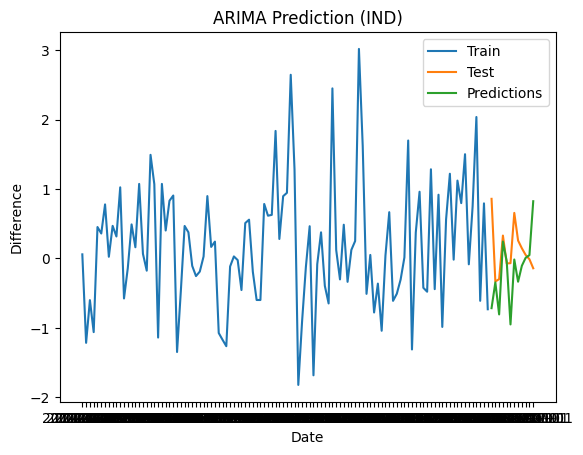

In [21]:
ind_pred_df = pd.DataFrame(ind_pred)
ind_pred_df.index = ind_pred_df.index.astype(str)
plt.plot(ind_train[:split_index], label='Train')
plt.plot(ind_test, label='Test')
plt.plot(ind_pred_df, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('ARIMA Prediction (IND)')
plt.legend()
plt.show()

In [22]:
mae_ind = mean_absolute_error(ind_test, ind_pred_df)
mse_ind = mean_squared_error(ind_test, ind_pred_df)
rmse_ind = np.sqrt(mean_squared_error(ind_test, ind_pred_df))
ind_perf = {'Currency':'Indian Rupees','MAE': mae_ind, 'MSE': mse_ind,
'RMSE': rmse_ind}
ind_perf = pd.DataFrame([ind_perf])
ind_perf

,Currency,MAE,MSE,RMSE
0,Indian Rupees,0.473409,0.444581,0.666769


#### Interpretation

<b>From Plot:</b> We observe that the model captures the trend very well, however, it looks like there is a downward shift in the predicted results.

<b>From Performance Metrics</b>: The error values are small `(RMSE < 1)`, indicating that the model captured the trend in the dataset and is reliable. However, we cannot compare this with the previous currencies (Euro and GBP) as the value ranges are different. 

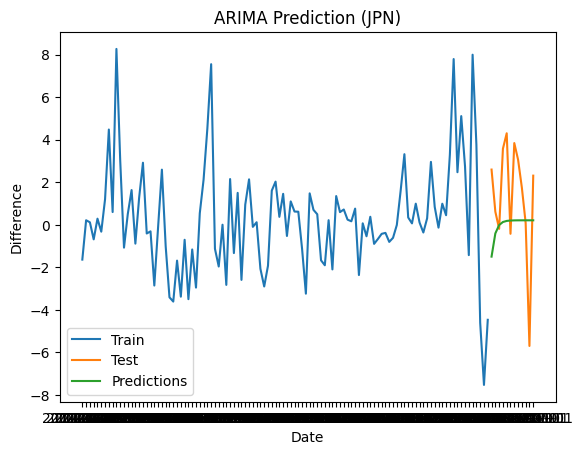

In [23]:
jap_pred_df = pd.DataFrame(japan_pred)
jap_pred_df.index = jap_pred_df.index.astype(str)
plt.plot(japan_train[:split_index], label='Train')
plt.plot(japan_test, label='Test')
plt.plot(jap_pred_df, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('ARIMA Prediction (JPN)')
plt.legend()
plt.show()

In [24]:
mae_jap = mean_absolute_error(japan_test, jap_pred_df)
mse_jap = mean_squared_error(japan_test, jap_pred_df)
rmse_jap = np.sqrt(mean_squared_error(japan_test, jap_pred_df))
jap_perf = {'Currency':'Japanese Yen','MAE': mae_jap, 'MSE': mse_jap,
'RMSE': rmse_jap}
jap_perf = pd.DataFrame([jap_perf])
jap_perf

,Currency,MAE,MSE,RMSE
0,Japanese Yen,2.470955,9.181426,3.030087


#### Interpretation

<b>From Plot:</b> We observe that the model captures the trend very well except for some unexpected dip in the actual observation.

<b>From Performance Metrics</b>: The error values are larger than`(RMSE > 1)`, indicating that the model tend to have higher prediction errors. 

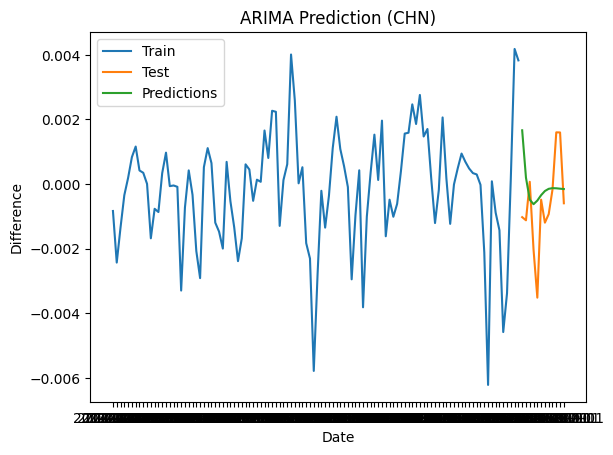

In [25]:
chn_pred_df = pd.DataFrame(chn_pred)
chn_pred_df.index = chn_pred_df.index.astype(str)
plt.plot(chn_train[:split_index], label='Train')
plt.plot(chn_test, label='Test')
plt.plot(chn_pred_df, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('ARIMA Prediction (CHN)')
plt.legend()
plt.show()

In [26]:
mae_chn = mean_absolute_error(chn_test, chn_pred_df)
mse_chn = mean_squared_error(chn_test, chn_pred_df)
rmse_chn = np.sqrt(mean_squared_error(chn_test, chn_pred_df))
chn_perf = {'Currency':'Chinese Yuan','MAE': mae_chn, 'MSE': mse_chn,
'RMSE': rmse_chn}
chn_perf = pd.DataFrame([chn_perf])
chn_perf

,Currency,MAE,MSE,RMSE
0,Chinese Yuan,0.001237,0.000002,0.001531


#### Interpretation

<b>From Plot:</b> We observe that the model does not capture the trend, and the actual observations (test) is varying too much from the predicted observations. However, we have to consider that the scale along the `y-axis` is very small and we should not conclude based on that.

<b>From Performance Metrics</b>: The error values are all very small `(RMSE < 0.01)`, indicating that the model successfully captured the trend in the dataset and is reliable, unlike the observation from the graph!

### ARIMA Forecasting

In [27]:
forecast_index = pd.date_range(start = '2024-02-01', periods =10, freq = 'MS')

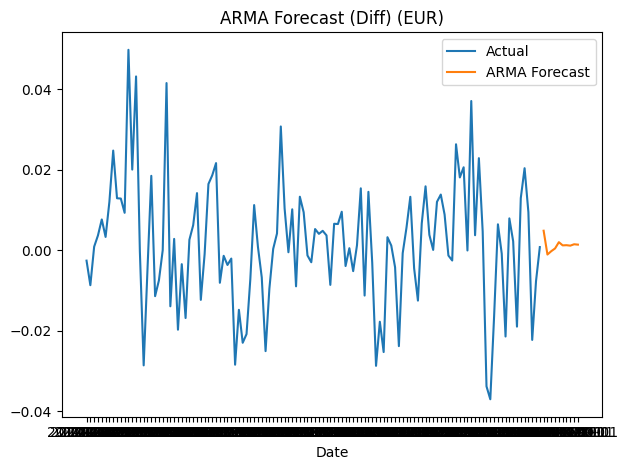

In [28]:
euro = ARIMA(euro_df['Differenced_Data'], order = (4, 0, 1))
euro_model = euro.fit()
euro_forecast = euro_model.forecast(steps=10)
euro_forecast.index = forecast_index.astype(str)
plt.plot(euro_df['Differenced_Data'][:], label='Actual')
plt.plot(euro_forecast, label='ARMA Forecast')
plt.title('ARMA Forecast (Diff) (EUR)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
euro_forecast_rates = euro_df['Exchange_rate'].iloc[-1] + euro_forecast.cumsum()
euro_forecasts = pd.concat([euro_df['Exchange_rate'], euro_forecast_rates], axis = 0)
euro_forecasts.to_csv('data/euro_arima_forecasts.csv')

In [30]:
euro_forecasts

2014-02-01    0.731797
2014-03-01    0.723170
2014-04-01    0.724113
2014-05-01    0.727855
2014-06-01    0.735565
                ...   
2024-07-01    0.925073
2024-08-01    0.926388
2024-09-01    0.927587
2024-10-01    0.929130
2024-11-01    0.930581
Length: 130, dtype: float64

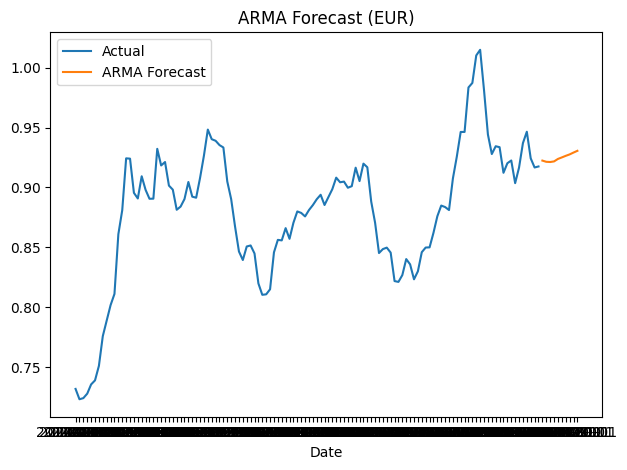

In [31]:
plt.plot(euro_df['Exchange_rate'][:], label='Actual')
plt.plot(euro_forecast_rates, label='ARMA Forecast')
plt.title('ARMA Forecast (EUR)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

#### Interpretation

The forecasting predicts that the USD might experience a slight ascend in value against EURO after a noticeable dip in December 2023 until September 2024.

Also. the model forecasts a slight dip in February 2024, but does not seem like a part of the trend, rather an outlier.

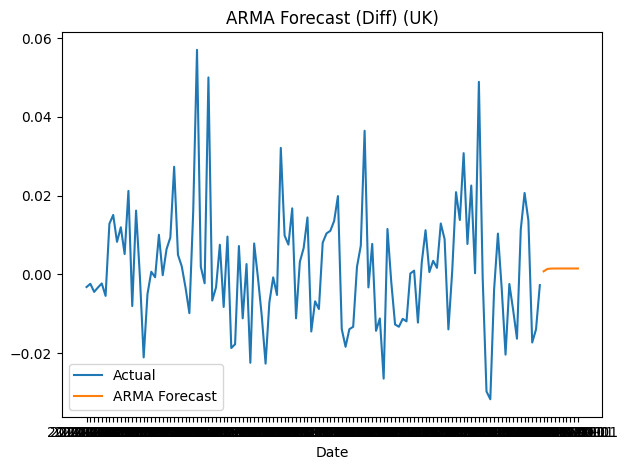

In [32]:
uk = ARIMA(uk_df['Differenced_Data'], order = (1,0,1))
uk_model = uk.fit()
uk_forecast = uk_model.forecast(steps=10)
uk_forecast.index = forecast_index.astype(str)
plt.plot(uk_df['Differenced_Data'][:], label='Actual')
plt.plot(uk_forecast, label='ARMA Forecast')
plt.title('ARMA Forecast (Diff) (UK)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

In [33]:
uk_forecast_rates = uk_df['Exchange_rate'].iloc[-1] + uk_forecast.cumsum()
uk_forecasts = pd.concat([uk_df['Exchange_rate'], uk_forecast_rates], axis = 0)
uk_forecasts.to_csv('data/uk_arima_forecasts.csv')

In [34]:
uk_forecasts

2014-02-01    0.603938
2014-03-01    0.601540
2014-04-01    0.597086
2014-05-01    0.593754
2014-06-01    0.591436
                ...   
2024-07-01    0.795398
2024-08-01    0.796882
2024-09-01    0.798366
2024-10-01    0.799850
2024-11-01    0.801334
Length: 130, dtype: float64

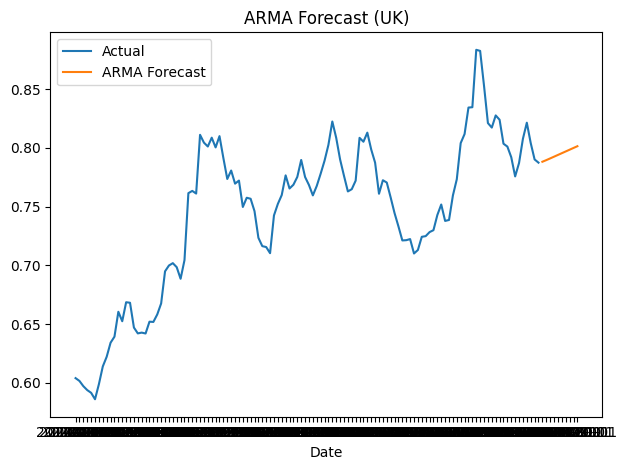

In [35]:
plt.plot(uk_df['Exchange_rate'][:], label='Actual')
plt.plot(uk_forecast_rates, label='ARMA Forecast')
plt.title('ARMA Forecast (UK)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

#### Interpretation

The USD tends to have a steady ascend against GBP from December 2023 to September 2024 without any fluctuation in the pattern.

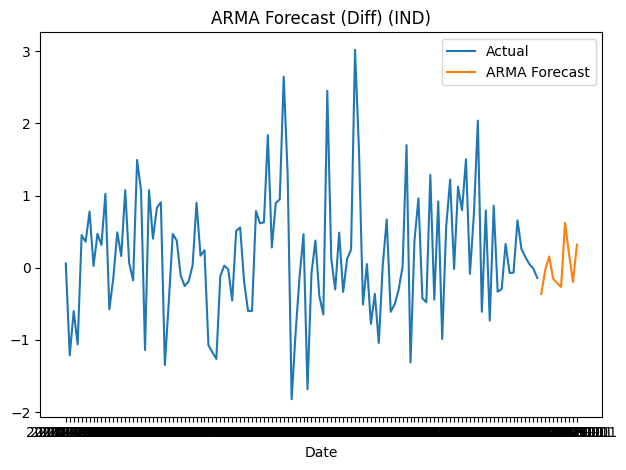

In [36]:
ind = ARIMA(ind_df['Differenced_Data'], order = (9,0,9))
ind_model = ind.fit()
ind_forecast = ind_model.forecast(steps=10)
ind_forecast.index = forecast_index.astype(str)
plt.plot(ind_df['Differenced_Data'][:], label='Actual')
plt.plot(ind_forecast, label='ARMA Forecast')
plt.title('ARMA Forecast (Diff) (IND)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
ind_forecast_rates = ind_df['Exchange_rate'].iloc[-1] + ind_forecast.cumsum()
ind_forecasts = pd.concat([ind_df['Exchange_rate'], ind_forecast_rates], axis = 0)
ind_forecasts.to_csv('data/ind_arima_forecasts.csv')

In [38]:
ind_forecasts

2014-02-01    62.164200
2014-03-01    60.947600
2014-04-01    60.346400
2014-05-01    59.284300
2014-06-01    59.736700
                ...    
2024-07-01    82.240171
2024-08-01    82.863367
2024-09-01    83.053291
2024-10-01    82.852632
2024-11-01    83.172163
Length: 130, dtype: float64

In [39]:
euro_df['Exchange_rate'].iloc[-1]

0.9175153683824204

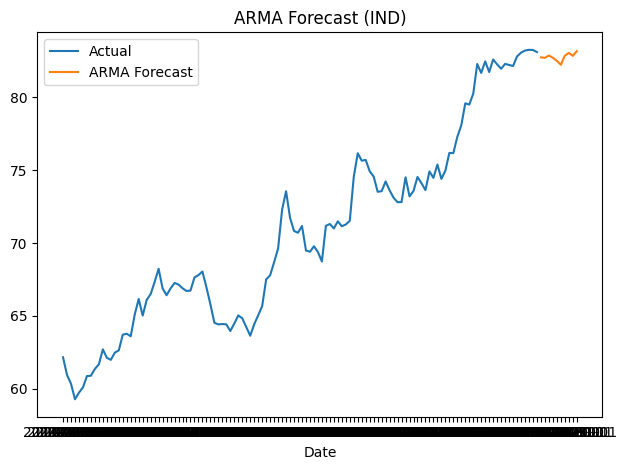

In [40]:
plt.plot(ind_df['Exchange_rate'][:], label='Actual')
plt.plot(ind_forecast_rates, label='ARMA Forecast')
plt.title('ARMA Forecast (IND)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

#### Interpretation

The forecasting shows that the USD currency value tends to remain steady as compared to INR over the next 10 months from December 2023. 

However, there are continuous ups and downs in the value maintaining a constant mean for the forecasted 10 months

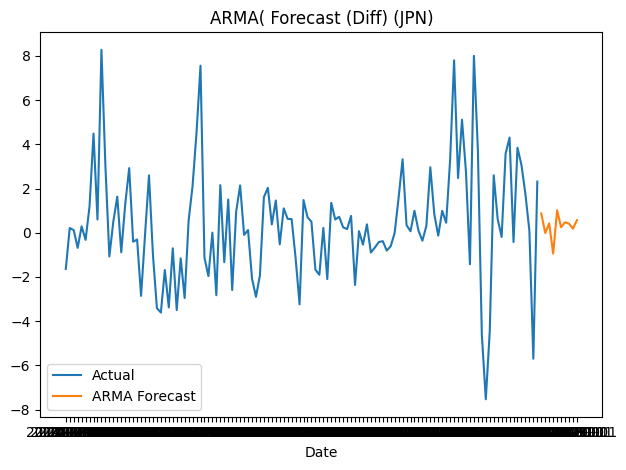

In [41]:
jap = ARIMA(japan_df['Differenced_Data'], order = (7,0,2))
japan_model = jap.fit()
jap_forecast = japan_model.forecast(steps=10)
jap_forecast.index = forecast_index.astype(str)
plt.plot(japan_df['Differenced_Data'][:], label='Actual')
plt.plot(jap_forecast, label='ARMA Forecast')
plt.title('ARMA( Forecast (Diff) (JPN)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

In [42]:
japan_forecast_rates = japan_df['Exchange_rate'].iloc[-1] + jap_forecast.cumsum()
japan_forecasts = pd.concat([japan_df['Exchange_rate'], japan_forecast_rates], axis = 0)
japan_forecasts.to_csv('data/japan_arima_forecasts.csv')

In [43]:
japan_forecasts

2014-02-01    102.125300
2014-03-01    102.339500
2014-04-01    102.458200
2014-05-01    101.773800
2014-06-01    102.062900
                 ...    
2024-07-01    147.900368
2024-08-01    148.375456
2024-09-01    148.788034
2024-10-01    148.974293
2024-11-01    149.541038
Length: 130, dtype: float64

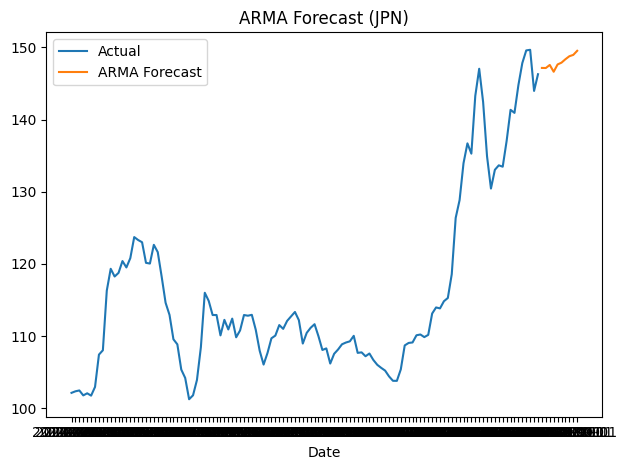

In [44]:
plt.plot(japan_df['Exchange_rate'][:], label='Actual')
plt.plot(japan_forecast_rates, label='ARMA Forecast')
plt.title('ARMA Forecast (JPN)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

#### Interpretation

The US Dollars tend to have a stable phase against Japanese Yen for the next 10 months from December 2023, with a slight ascending in value in the last 4 months of the forecasting horizon. 

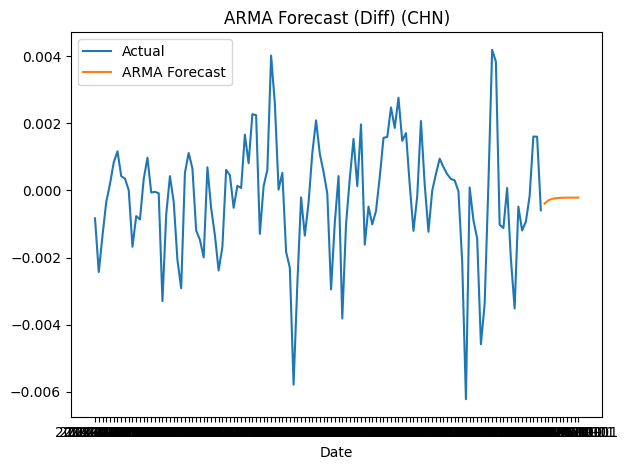

In [45]:
chn = ARIMA(chn_df['Differenced_Data'], order = (1,0,0))
chn_model = chn.fit()
chn_forecast = chn_model.forecast(steps=10)
chn_forecast.index = forecast_index.astype(str)
plt.plot(chn_df['Differenced_Data'][:], label='Actual')
plt.plot(chn_forecast, label='ARMA Forecast')
plt.title('ARMA Forecast (Diff) (CHN)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

In [46]:
chn_forecast_rates = chn_df['Exchange_rate'].iloc[-1] + chn_forecast.cumsum()
chn_forecasts = pd.concat([chn_df['Exchange_rate'], chn_forecast_rates], axis = 0)
chn_forecasts.to_csv('data/chn_arima_forecasts.csv')

In [47]:
chn_forecasts

2014-02-01    0.164430
2014-03-01    0.161998
2014-04-01    0.160653
2014-05-01    0.160308
2014-06-01    0.160498
                ...   
2024-07-01    0.137831
2024-08-01    0.137613
2024-09-01    0.137395
2024-10-01    0.137178
2024-11-01    0.136962
Length: 130, dtype: float64

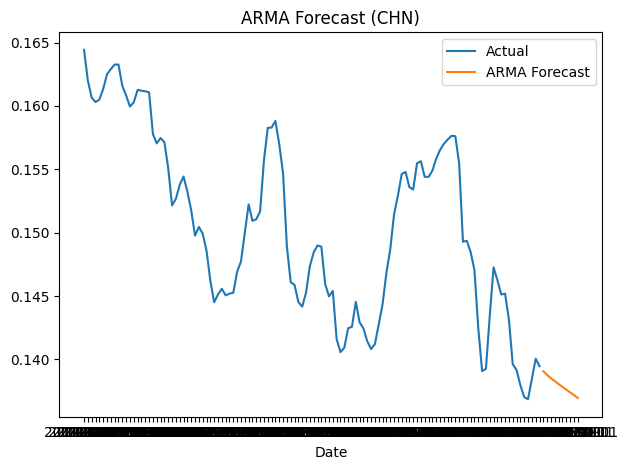

In [48]:
plt.plot(chn_df['Exchange_rate'][:], label='Actual')
plt.plot(chn_forecast_rates, label='ARMA Forecast')
plt.title('ARMA Forecast (CHN)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

#### Interpretation

The value of US Dollars will suffer a drop against Chinese Yuan after attaining a local maximum in January 2024 until September 2024. This shows that Chinese Yuan will have a growth phase during this time period.

### SARIMA Modeling & Forecasting

In SARIMA (Seasonal AutoRegressive Integrated Moving Average) forecasting, the seasonal order refers to the seasonal components of the model. Specifically, it includes the seasonal autoregressive (SAR), seasonal differencing (D), and seasonal moving average (SMA) terms.

The seasonal order is denoted as `(P, D, Q, m)`, where:

- `P` is the order of the seasonal autoregressive (SAR) component.
- `D` is the degree of differencing for the seasonal component.
- `Q` is the order of the seasonal moving average (SMA) component.
- `m` is the number of time steps in each seasonal period.

Here's a brief explanation of each component:

1. **Seasonal Autoregressive (SAR) component `P`:** It represents the relationship between the observation and a certain number of lagged observations in previous seasonal periods.

2. **Seasonal Differencing `P`:** It refers to differencing the series by subtracting the observation from the same season of the previous year. This is done to remove the seasonal component from the series.

3. **Seasonal Moving Average (SMA) component `Q`:** It represents the relationship between the observation and the residual errors from a moving average model applied to lagged observations in previous seasonal periods.

4. **Seasonal Period `m`:** It specifies the number of time steps in each seasonal cycle. For example, if the data exhibits a yearly seasonality, `m` would typically be 12 for monthly data (12 months in a year).

Together, the seasonal order determines how the seasonal patterns in the data are captured and modeled in SARIMA forecasting. Choosing the appropriate values for \( P \), \( D \), \( Q \), and \( m \) requires analyzing the seasonality in the data and experimenting with different combinations to find the model that best fits the data and yields accurate forecasts.

#### Determining the Seasonal Orders

In [53]:
!pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
    --------------------------------------- 10.2/625.1 kB ? eta -:--:--
   --- ----------------------------------- 61.4/625.1 kB 812.7 kB/s eta 0:00:01
   ----------- ---------------------------- 174.1/625.1 kB 1.5 MB/s eta 0:00:01
   ------------------------ --------------- 389.1/625.1 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------  624.6/625.1 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 625.1/625.1 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.6/2.8 MB 17.5 MB/s eta 0:00:01
   ------------ --------------------------- 0.9/2.8 MB 14.0 MB/s eta 0:00:01
   ---------------- ----------------------- 1.2/2.8 MB 10.8 MB/s eta 0:00:01
   ---------------- ----------------------- 1.2/2.8 MB 10.8 MB/s eta 0:00:01
   ---------------- ----------------------- 1.2/2.8 MB 10.8 MB/s eta 0:00:01
   


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
from pmdarima.arima import auto_arima

In [55]:
euro_params = auto_arima(euro_train, start_p = 1,max_p = 10, start_q = 1, max_q = 10, seasonal=True, m=12, suppress_warnings=True, d=None,D=1, trace=True, error_action='ignore', stepwise=True)
print(euro_params.order)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=-499.158, Time=0.72 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-455.357, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-491.271, Time=0.25 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-498.717, Time=0.24 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-457.212, Time=0.03 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=-489.681, Time=0.42 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=-496.845, Time=1.53 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=-466.799, Time=0.27 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=-498.510, Time=0.74 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=-493.065, Time=0.56 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=-489.521, Time=1.67 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=-497.281, Time=0.46 sec
 ARIMA(1,0,0)(1,1,1)[12] inte

In [56]:
uk_params = auto_arima(uk_train,  start_p = 1,max_p = 10, start_q = 1, max_q = 10,seasonal=True, m=12, suppress_warnings=True, d=None,D=1, trace=True, error_action='ignore', stepwise=True)
print(uk_params.order)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=-492.312, Time=0.74 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-461.299, Time=0.16 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-485.244, Time=0.78 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-496.073, Time=0.59 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-463.283, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=-463.459, Time=0.29 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=-494.065, Time=0.69 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=-494.098, Time=1.61 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=-485.531, Time=0.27 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=-492.167, Time=1.68 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-493.851, Time=0.30 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=-494.328, Time=0.70 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=-494.170, Time=1.00 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-496.289, Time=0.49 sec
 ARIMA(1,0,0)(0,1,0

In [57]:
ind_params = auto_arima(ind_train,  start_p = 1,max_p = 10, start_q = 1, max_q = 10,seasonal=True, m=12, suppress_warnings=True, d=None,D=1, trace=True, error_action='ignore', stepwise=True)
print(ind_params.order)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=323.382, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=308.570, Time=0.11 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=290.334, Time=0.17 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=321.723, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=323.696, Time=0.04 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=308.513, Time=0.10 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=1.52 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=289.051, Time=0.14 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=307.411, Time=0.07 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=292.561, Time=

In [58]:
japan_params = auto_arima(japan_train,  start_p = 1,max_p = 10, start_q = 1, max_q = 10,seasonal=True, m=12, suppress_warnings=True, d=None,D=1, trace=True, error_action='ignore', stepwise=True)
print(japan_params.order)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=458.848, Time=0.26 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=486.800, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=458.369, Time=0.11 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=459.602, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=484.802, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=469.465, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=459.519, Time=0.30 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=457.979, Time=0.16 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=456.023, Time=0.14 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=457.982, Time=0.29 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=459.743, Time=0.55 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=470.028, Time=0.13 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=456.857, Time=0.19 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=456.936, Time=0.20 sec
 ARIMA(2,0,1)(0,1,1)[12] intercep

In [59]:
chn_params = auto_arima(chn_train, start_p = 1,max_p = 10, start_q = 1, max_q = 10, seasonal=True, m=12, suppress_warnings=True, d=None,D=1, trace=True, error_action='ignore', stepwise=True)
print(chn_params.order)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=-926.464, Time=0.71 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-883.432, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-915.514, Time=0.47 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-931.751, Time=0.23 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-885.373, Time=0.04 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=-904.524, Time=0.34 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=-923.930, Time=0.59 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=-924.451, Time=0.89 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=-913.920, Time=0.21 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=-909.895, Time=1.26 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-910.586, Time=0.20 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=-933.894, Time=0.66 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=-905.470, Time=0.18 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=-923.219, Time=1.69 sec
 ARIMA(1,0,1)(1,1,0

In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Training SARIMA model and Forecasting 

#### Euro Data

In [61]:
euro_sarima = SARIMAX(euro_train, order = (7,0,2), seasonal_order = (0,1,1,12),enforce_stationarity=False, enforce_invertibility=False)
euro_sarima_fit = euro_sarima.fit()

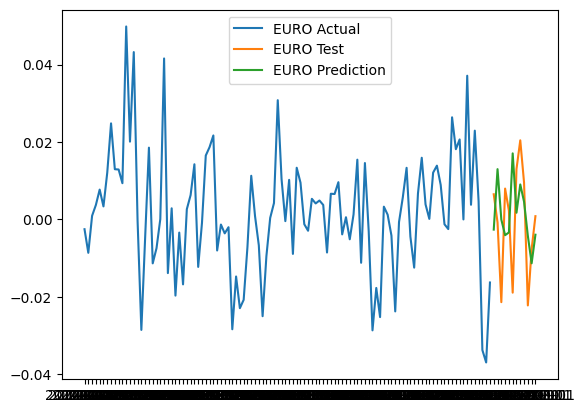

In [63]:
euro_predict_sarima = euro_sarima_fit.predict(start, end).rename('SARIMA EURO Prediction')
euro_predict_sarima_df = pd.DataFrame(euro_predict_sarima)
euro_predict_sarima_df.index = euro_predict_sarima_df.index.astype(str)
plt.plot(euro_train, label = 'EURO Actual')
plt.plot(euro_test, label = 'EURO Test')
plt.plot(euro_predict_sarima_df, label = 'EURO Prediction')
plt.legend()
plt.show()


In [64]:
mae_euro_sarima = mean_absolute_error(euro_test, euro_predict_sarima_df)
mse_euro_sarima = mean_squared_error(euro_test, euro_predict_sarima_df)
rmse_euro_sarima = np.sqrt(mean_squared_error(euro_test, euro_predict_sarima_df))
euro_perf_sarima = {'Currency':'Euro','MAE': mae_euro_sarima, 'MSE': mse_euro_sarima,
'RMSE': rmse_euro_sarima}
euro_perf_sarima = pd.DataFrame([euro_perf_sarima])
euro_perf_sarima

,Currency,MAE,MSE,RMSE
0,Euro,0.012668,0.000237,0.01539


#### Interpretation

<b>From Plot:</b> The SARIMA model captures the trend in the data and gives a good prediction that aligns with the actual data.

<b>From Performance Metrics:</b> The model has small errors `(RMSE < 0.02)` implying that the prediction is prone to very less errors.

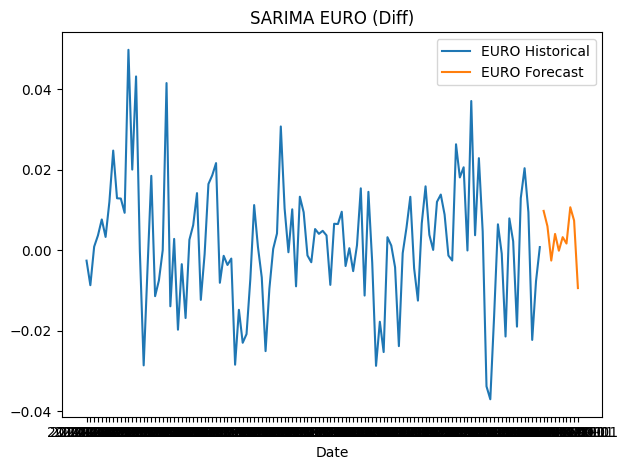

In [65]:
euro_sarima = SARIMAX(euro_df['Differenced_Data'], order = (7,0,2), seasonal_order = (0,1,1,12),enforce_stationarity=False, enforce_invertibility=False)
euro_sarima_fit = euro_sarima.fit()
euro_forecast_sarima = euro_sarima_fit.forecast(steps = 10)
#euro_forecast_sarima_df = pd.DataFrame(euro_forecast_sarima)
euro_forecast_sarima.index = forecast_index.astype(str)
plt.title('SARIMA EURO (Diff)')
plt.plot(euro_df['Differenced_Data'], label = 'EURO Historical')
plt.plot(euro_forecast_sarima, label = 'EURO Forecast')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

In [66]:
euro_forecast_rates_sarima = euro_df['Exchange_rate'].iloc[-1] + euro_forecast_sarima.cumsum()
euro_forecasts2 = pd.concat([euro_df['Exchange_rate'], euro_forecast_rates_sarima], axis = 0)
euro_forecasts2.to_csv('data/euro_sarima_forecasts.csv')

In [67]:
euro_forecasts2

2014-02-01    0.731797
2014-03-01    0.723170
2014-04-01    0.724113
2014-05-01    0.727855
2014-06-01    0.735565
                ...   
2024-07-01    0.938233
2024-08-01    0.939956
2024-09-01    0.950699
2024-10-01    0.958125
2024-11-01    0.948782
Length: 130, dtype: float64

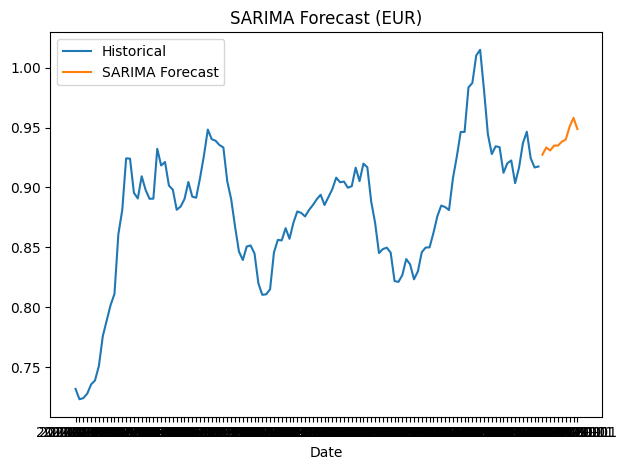

In [68]:
plt.plot(euro_df['Exchange_rate'][:], label='Historical')
plt.plot(euro_forecast_rates_sarima, label='SARIMA Forecast')
plt.title('SARIMA Forecast (EUR)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

#### Interpretation

USD/Euro ratio experiences a dip in December 2023 and then follows an ascending trend with a few dips along the way till September 2024. The USD value against Euro will slightly increase over this period.

#### UK Data

In [69]:
uk_sarima = SARIMAX(uk_train, order = (1,0,1), seasonal_order = (0,1,1,12),enforce_stationarity=False, enforce_invertibility=False)
uk_sarima_fit = uk_sarima.fit()

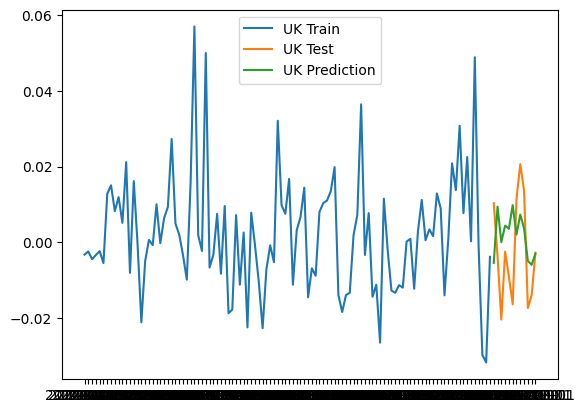

In [70]:
uk_predict_sarima = uk_sarima_fit.predict(start, end).rename('SARIMA UK Prediction')
uk_predict_sarima_df = pd.DataFrame(uk_predict_sarima)
uk_predict_sarima_df.index = uk_predict_sarima_df.index.astype(str)
plt.plot(uk_train[:split_index], label = 'UK Train')
plt.plot(uk_test, label = 'UK Test')
plt.plot(uk_predict_sarima_df, label = 'UK Prediction')
plt.legend()
plt.show()

In [71]:
mae_uk_sarima = mean_absolute_error(uk_test, uk_predict_sarima_df)
mse_uk_sarima = mean_squared_error(uk_test, uk_predict_sarima_df)
rmse_uk_sarima = np.sqrt(mean_squared_error(uk_test, uk_predict_sarima_df))
uk_perf_sarima = {'Currency':'UK Pound','MAE': mae_uk_sarima, 'MSE': mse_uk_sarima,
'RMSE': rmse_uk_sarima}
uk_perf_sarima = pd.DataFrame([uk_perf_sarima])
uk_perf_sarima

,Currency,MAE,MSE,RMSE
0,UK Pound,0.012365,0.000193,0.013887


#### Interpretation

<b>From Plot:</b> The SARIMA model captures the trend in the data and gives a prediction that aligns with the fluctuations in the actual data.

<b>From Performance Metrics:</b> The model has small errors `(RMSE < 0.02)` implying that the prediction is prone to very less errors.

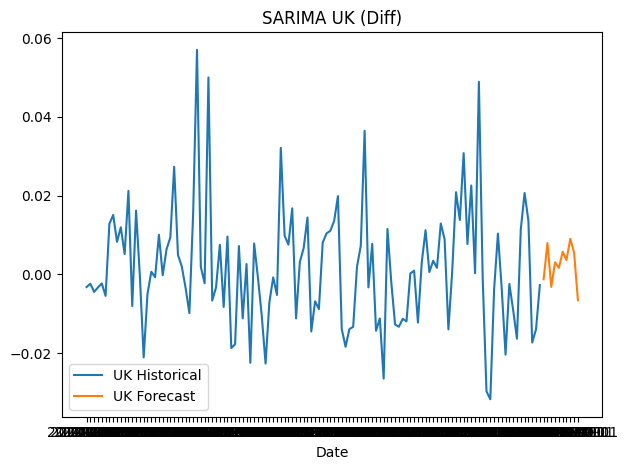

In [72]:
uk_sarima = SARIMAX(uk_df['Differenced_Data'], order = (1,0,1), seasonal_order = (0,1,1,12),enforce_stationarity=False, enforce_invertibility=False)
uk_sarima_fit = uk_sarima.fit()
uk_forecast_sarima = uk_sarima_fit.forecast(steps = 10)
#uk_forecast_sarima_df = pd.DataFrame(uk_forecast_sarima)
uk_forecast_sarima.index = forecast_index.astype(str)
plt.title('SARIMA UK (Diff)')
plt.plot(uk_df['Differenced_Data'], label = 'UK Historical')
plt.plot(uk_forecast_sarima, label = 'UK Forecast')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

In [73]:
uk_forecast_rates_sarima = uk_df['Exchange_rate'].iloc[-1] + uk_forecast_sarima.cumsum()
uk_forecasts2 = pd.concat([uk_df['Exchange_rate'], uk_forecast_rates_sarima], axis = 0)
uk_forecasts2.to_csv('data/uk_sarima_forecasts.csv')

In [ ]:
uk_forecasts2

2014-02-01    0.603938
2014-03-01    0.601540
2014-04-01    0.597086
2014-05-01    0.593754
2014-06-01    0.591436
                ...   
2024-05-01    0.799055
2024-06-01    0.800693
2024-07-01    0.806394
2024-08-01    0.810019
2024-09-01    0.819042
Length: 128, dtype: float64

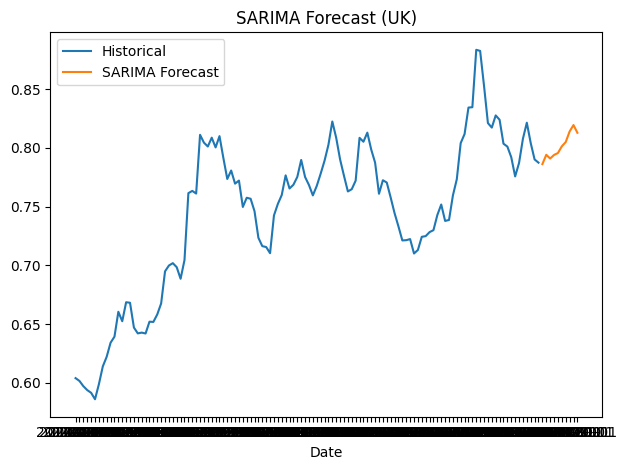

In [74]:
plt.plot(uk_df['Exchange_rate'][:], label='Historical')
plt.plot(uk_forecast_rates_sarima, label='SARIMA Forecast')
plt.title('SARIMA Forecast (UK)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

#### Interpretation

USD/GBP ratio is forecasted to have an upward climb from December 2023 with occasional insignificant dips. This implies that the USD will gain greater value over GBP in this period.

#### India Data

In [75]:
ind_sarima = SARIMAX(ind_train, order = (9,0,9), seasonal_order = (0,1,1,12),enforce_stationarity=False, enforce_invertibility=False)
ind_sarima_fit = ind_sarima.fit()

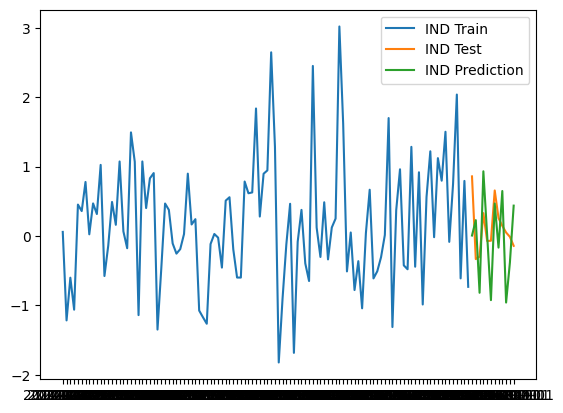

In [77]:
ind_predict_sarima = ind_sarima_fit.predict(start, end).rename('SARIMA Ind Prediction')
ind_predict_sarima_df = pd.DataFrame(ind_predict_sarima)
ind_predict_sarima_df.index = ind_predict_sarima_df.index.astype(str)
plt.plot(ind_train[:split_index], label = 'IND Train')
plt.plot(ind_test, label = 'IND Test')
plt.plot(ind_predict_sarima_df, label = 'IND Prediction')
plt.legend()
plt.show()

In [78]:
mae_ind_sarima = mean_absolute_error(ind_test, ind_predict_sarima_df)
mse_ind_sarima = mean_squared_error(ind_test, ind_predict_sarima_df)
rmse_ind_sarima = np.sqrt(mean_squared_error(ind_test, ind_predict_sarima_df))
ind_perf_sarima = {'Currency':'Indian Rupees','MAE': mae_ind_sarima, 'MSE': mse_ind_sarima,
'RMSE': rmse_ind_sarima}
ind_perf_sarima = pd.DataFrame([ind_perf_sarima])
ind_perf_sarima

,Currency,MAE,MSE,RMSE
0,Indian Rupees,0.5462,0.3647,0.603904


#### Interpretation

<b>From Plot:</b> The SARIMA model captures the trend in the data and gives a prediction that aligns with the ups and downs in the actual data.

<b>From Performance Metrics:</b> The model has significant errors `(RMSE < 0.5)` implying that the prediction is prone to errors as compared to the Euro and GBP data. However, the scale of USD/INR is greater than Euro and GBP ratios and therefore cannot be compared directly. 

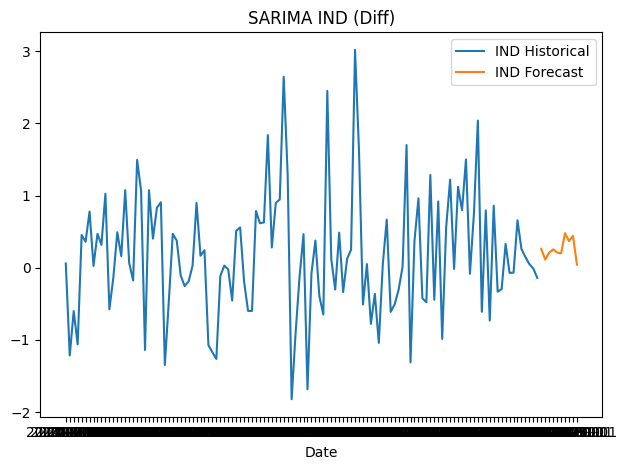

In [79]:
ind_sarima = SARIMAX(ind_df['Differenced_Data'], order = (1,0,1), seasonal_order = (0,1,1,12),enforce_stationarity=False, enforce_invertibility=False)
ind_sarima_fit = ind_sarima.fit()
ind_forecast_sarima = ind_sarima_fit.forecast(steps = 10)
#ind_forecast_sarima_df = pd.DataFrame(ind_forecast_sarima)
ind_forecast_sarima.index = forecast_index.astype(str)
plt.title('SARIMA IND (Diff)')
plt.plot(ind_df['Differenced_Data'], label = 'IND Historical')
plt.plot(ind_forecast_sarima, label = 'IND Forecast')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

In [81]:
ind_forecast_rates_sarima = ind_df['Exchange_rate'].iloc[-1] + ind_forecast_sarima.cumsum()
ind_forecasts2 = pd.concat([ind_df['Exchange_rate'], ind_forecast_rates_sarima], axis = 0)
ind_forecasts2.to_csv('data/ind_sarima_forecasts.csv')

In [82]:
ind_forecasts2

2014-02-01    62.164200
2014-03-01    60.947600
2014-04-01    60.346400
2014-05-01    59.284300
2014-06-01    59.736700
                ...    
2024-07-01    84.355244
2024-08-01    84.832686
2024-09-01    85.200697
2024-10-01    85.641949
2024-11-01    85.684347
Length: 130, dtype: float64

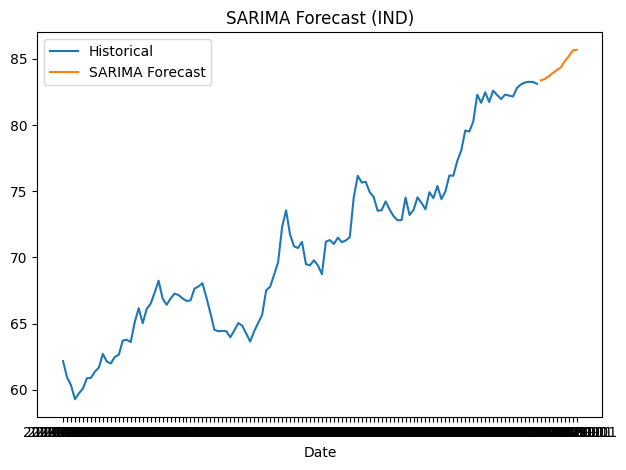

In [83]:
plt.plot(ind_df['Exchange_rate'][:], label='Historical')
plt.plot(ind_forecast_rates_sarima, label='SARIMA Forecast')
plt.title('SARIMA Forecast (IND)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

#### Interpretation

USD/INR ratio will experience a steep rise from December 2023 to September 2024 with September2024 having the greatest monetary value for USD against INR. The value is USD will be ascending throughout the period.

#### Japan Data

In [84]:
jap_sarima = SARIMAX(japan_train, order = (7,0,2), seasonal_order = (0,1,1,12),enforce_stationarity=False, enforce_invertibility=False)
jap_sarima_fit = jap_sarima.fit()

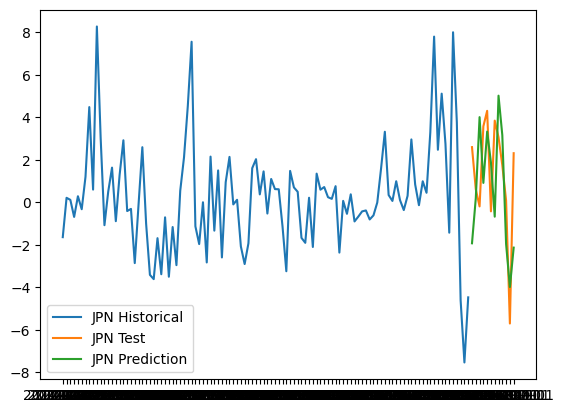

In [85]:
jap_predict_sarima = jap_sarima_fit.predict(start, end).rename('SARIMA jap Prediction')
jap_predict_sarima_df = pd.DataFrame(jap_predict_sarima)
jap_predict_sarima_df.index = jap_predict_sarima_df.index.astype(str)
plt.plot(japan_train[:split_index], label = 'JPN Historical')
plt.plot(japan_test, label = 'JPN Test')
plt.plot(jap_predict_sarima_df, label = 'JPN Prediction')
plt.legend()
plt.show()

In [86]:
mae_jap_sarima = mean_absolute_error(japan_test, jap_predict_sarima_df)
mse_jap_sarima = mean_squared_error(japan_test, jap_predict_sarima_df)
rmse_jap_sarima = np.sqrt(mean_squared_error(japan_test, jap_predict_sarima_df))
jap_perf_sarima = {'Currency':'Japanese Yen','MAE': mae_jap_sarima, 'MSE': mse_jap_sarima,
'RMSE': rmse_jap_sarima}
jap_perf_sarima = pd.DataFrame([jap_perf_sarima])
jap_perf_sarima

,Currency,MAE,MSE,RMSE
0,Japanese Yen,2.597536,8.722368,2.953366


#### Interpretation

<b>From Plot:</b> The SARIMA model captures the trend in the data and gives a prediction that aligns fluctuations in the actual data.

<b>From Performance Metrics:</b> The model has significant errors `(RMSE > 1)` implying that the prediction is not reliable and is prone to errors as compared to the Euro, GBP, and INR data. However, the scale of USD/JPY is greater than Euro and GBP ratios and therefore cannot be compared directly. 

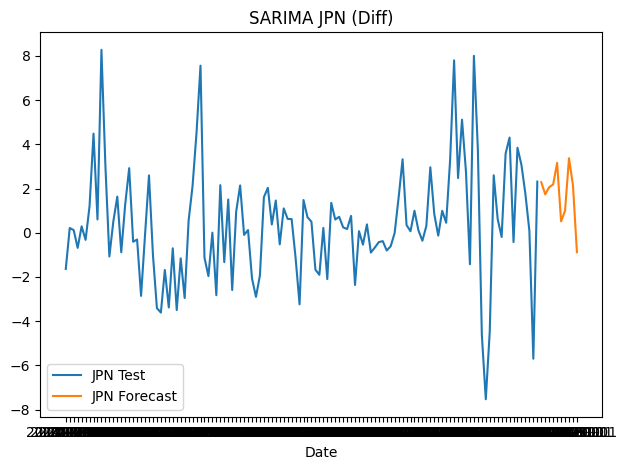

In [87]:
jap_sarima = SARIMAX(japan_df['Differenced_Data'], order = (1,0,1), seasonal_order = (0,1,1,12),enforce_stationarity=False, enforce_invertibility=False)
jap_sarima_fit = jap_sarima.fit()
jap_forecast_sarima = jap_sarima_fit.forecast(steps = 10)
#jap_forecast_sarima_df = pd.DataFrame(jap_forecast_sarima)
jap_forecast_sarima.index = forecast_index.astype(str)
plt.title('SARIMA JPN (Diff)')
plt.plot(japan_df['Differenced_Data'], label = 'JPN Test')
plt.plot(jap_forecast_sarima, label = 'JPN Forecast')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

In [88]:
jap_forecast_rates_sarima = japan_df['Exchange_rate'].iloc[-1] + jap_forecast_sarima.cumsum()
japan_forecasts2 = pd.concat([japan_df['Exchange_rate'], jap_forecast_rates_sarima], axis = 0)
japan_forecasts2.to_csv('data/japan_sarima_forecasts.csv')

In [ ]:
japan_forecasts2

2014-02-01    102.125300
2014-03-01    102.339500
2014-04-01    102.458200
2014-05-01    101.773800
2014-06-01    102.062900
                 ...    
2024-05-01    151.914828
2024-06-01    154.813437
2024-07-01    155.308960
2024-08-01    156.105149
2024-09-01    159.327334
Length: 128, dtype: float64

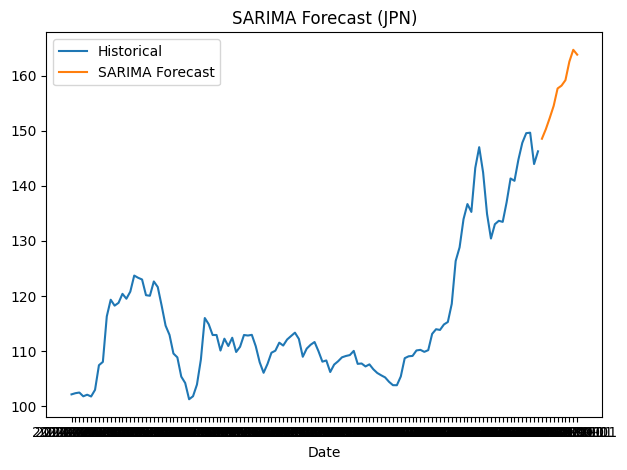

In [89]:
plt.plot(japan_df['Exchange_rate'][:], label='Historical')
plt.plot(jap_forecast_rates_sarima, label='SARIMA Forecast')
plt.title('SARIMA Forecast (JPN)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

#### Interpretation

USD/JPY ratio will experience a steep rise from December 2023 to September 2024 with September 2024 having the greatest monetary value for USD against JPY. The value is USD will be ascending throughout the period.

#### China Data

In [90]:
chn_sarima = SARIMAX(chn_train, order = (1,0,0), seasonal_order = (0,1,1,12),enforce_stationarity=False, enforce_invertibility=False)
chn_sarima_fit = chn_sarima.fit()

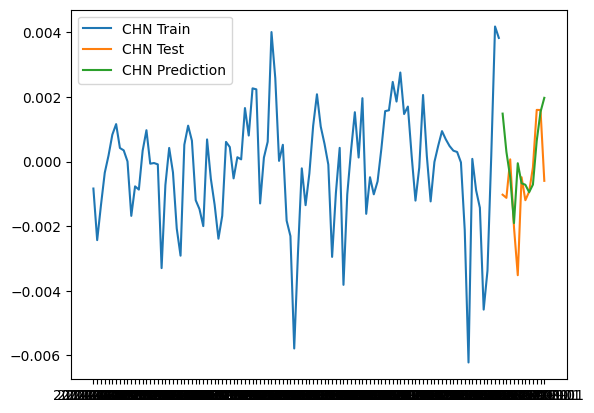

In [92]:
chn_predict_sarima = chn_sarima_fit.predict(start, end)
chn_predict_sarima_df = pd.DataFrame(chn_predict_sarima)
chn_predict_sarima_df.index = chn_predict_sarima_df.index.astype(str)
plt.plot(chn_train[:split_index], label = 'CHN Train')
plt.plot(chn_test, label = 'CHN Test')
plt.plot(chn_predict_sarima_df, label = 'CHN Prediction')
plt.legend()
plt.show()

In [93]:
mae_chn_sarima = mean_absolute_error(chn_test, chn_predict_sarima_df)
mse_chn_sarima = mean_squared_error(chn_test, chn_predict_sarima_df)
rmse_chn_sarima = np.sqrt(mean_squared_error(chn_test, chn_predict_sarima_df))
chn_perf_sarima = {'Currency':'Chinese Yuan','MAE': mae_chn_sarima, 'MSE': mse_chn_sarima,
'RMSE': rmse_chn_sarima}
chn_perf_sarima = pd.DataFrame([chn_perf_sarima])
chn_perf_sarima

,Currency,MAE,MSE,RMSE
0,Chinese Yuan,0.001074,0.000002,0.001548


#### Interpretation

<b>From Plot:</b> The SARIMA model captures the trend in the data and gives a prediction that aligns with the fluctuations in the actual data, except for the unexpected observations.

<b>From Performance Metrics:</b> The model has small errors `(RMSE < 0.002)` implying that the prediction highly reliable and not prone to much errors.

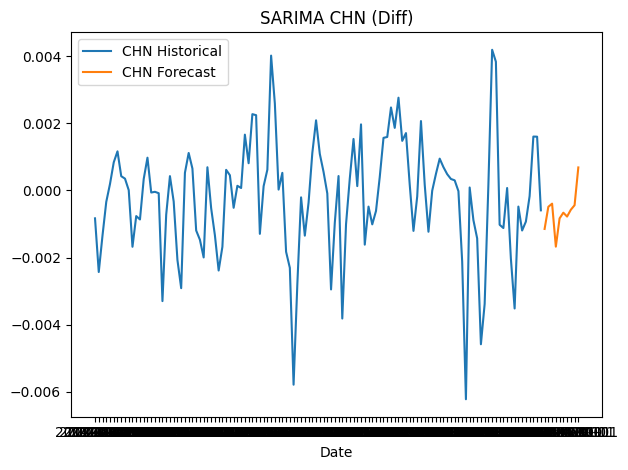

In [94]:
chn_sarima = SARIMAX(chn_df['Differenced_Data'], order = (1,0,1), seasonal_order = (0,1,1,12),enforce_stationarity=False, enforce_invertibility=False)
chn_sarima_fit = chn_sarima.fit()
chn_forecast_sarima = chn_sarima_fit.forecast(steps = 10)
#chn_forecast_sarima_df = pd.DataFrame(chn_forecast_sarima)
chn_forecast_sarima.index = forecast_index.astype(str)
plt.title('SARIMA CHN (Diff)')
plt.plot(chn_df['Differenced_Data'], label = 'CHN Historical')
plt.plot(chn_forecast_sarima, label = 'CHN Forecast')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

In [95]:
chn_forecast_rates_sarima = chn_df['Exchange_rate'].iloc[-1] + chn_forecast_sarima.cumsum()
chn_forecasts2 = pd.concat([chn_df['Exchange_rate'], chn_forecast_rates_sarima], axis = 0)
chn_forecasts2.to_csv('data/chn_sarima_forecasts.csv')

In [96]:
chn_forecasts2

2014-02-01    0.164430
2014-03-01    0.161998
2014-04-01    0.160653
2014-05-01    0.160308
2014-06-01    0.160498
                ...   
2024-07-01    0.134243
2024-08-01    0.133463
2024-09-01    0.132885
2024-10-01    0.132442
2024-11-01    0.133124
Length: 130, dtype: float64

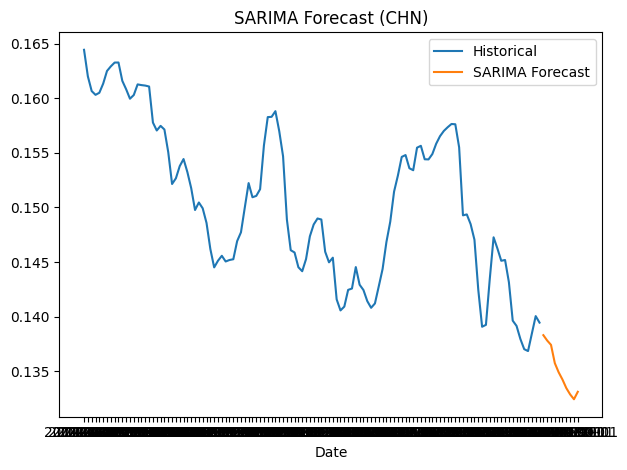

In [97]:
plt.plot(chn_df['Exchange_rate'][:], label='Historical')
plt.plot(chn_forecast_rates_sarima, label='SARIMA Forecast')
plt.title('SARIMA Forecast (CHN)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

#### Interpretation

USD/CHY ratio will experience a nose dive from January 2024 to September 2024. The USD will lose its value against CHY during this period as opposed to its performance with other currencies. i.e., Chinese Yuan will be in its strong phase throughout this period and the strongest among all the currencies considered, not in terms of value.

### Summary

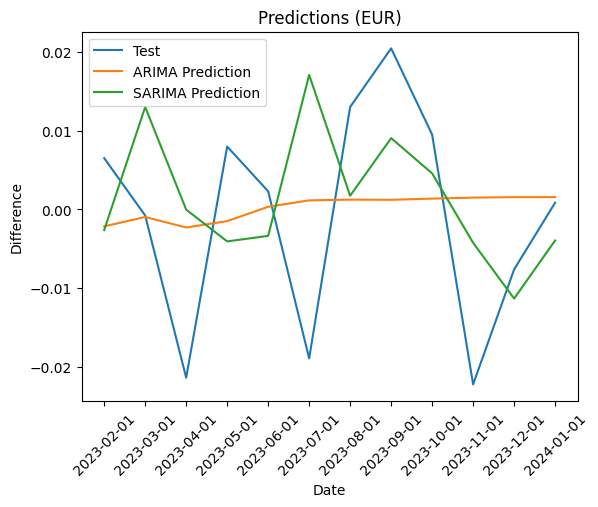

In [98]:
plt.plot(euro_test, label='Test')
plt.plot(euro_pred_df, label='ARIMA Prediction')
plt.plot(euro_predict_sarima_df, label = 'SARIMA Prediction')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Predictions (EUR)')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

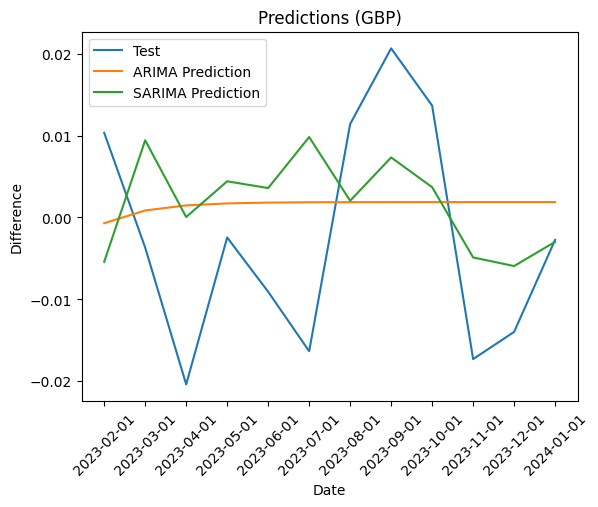

In [100]:
plt.plot(uk_test, label='Test')
plt.plot(uk_pred_df, label='ARIMA Prediction')
plt.plot(uk_predict_sarima_df, label = 'SARIMA Prediction')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Predictions (GBP)')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

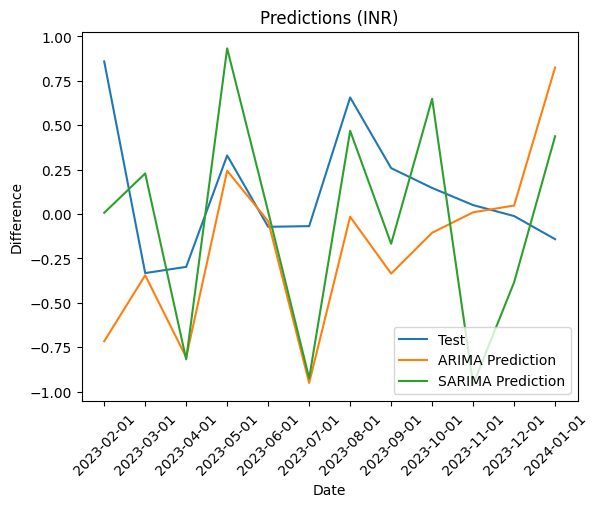

In [101]:
plt.plot(ind_test, label='Test')
plt.plot(ind_pred_df, label='ARIMA Prediction')
plt.plot(ind_predict_sarima_df, label = 'SARIMA Prediction')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Predictions (INR)')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

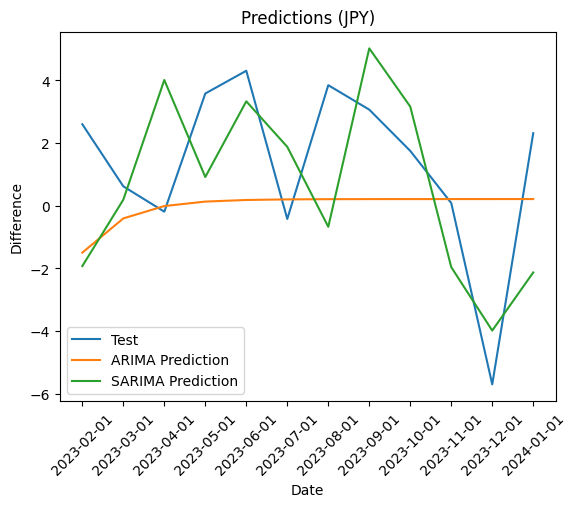

In [102]:
plt.plot(japan_test, label='Test')
plt.plot(jap_pred_df, label='ARIMA Prediction')
plt.plot(jap_predict_sarima_df, label = 'SARIMA Prediction')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Predictions (JPY)')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

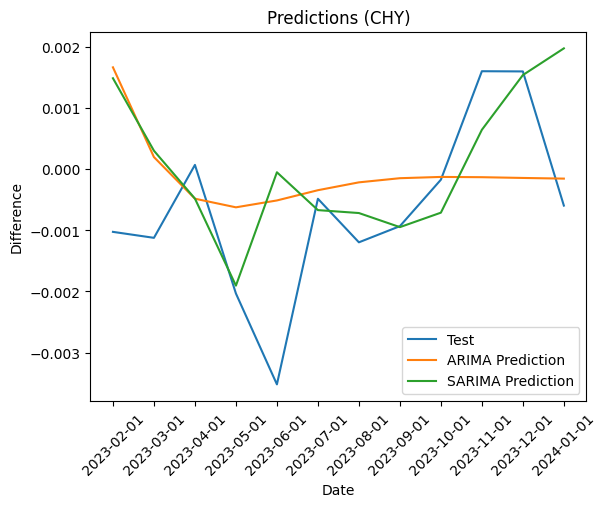

In [103]:
plt.plot(chn_test, label='Test')
plt.plot(chn_pred_df, label='ARIMA Prediction')
plt.plot(chn_predict_sarima_df, label = 'SARIMA Prediction')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Predictions (CHY)')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [104]:
arima_perf = pd.concat([euro_perf, uk_perf, ind_perf, jap_perf, chn_perf], axis = 0)
arima_perf

,Currency,MAE,MSE,RMSE
0,Euro,0.011013,0.000180,0.013405
0,UK Pound,0.012539,0.000193,0.013878
0,Indian Rupees,0.473409,0.444581,0.666769
0,Japanese Yen,2.470955,9.181426,3.030087
0,Chinese Yuan,0.001237,0.000002,0.001531


In [105]:
sarima_perf = pd.concat([euro_perf_sarima, uk_perf_sarima, ind_perf_sarima, jap_perf_sarima, chn_perf_sarima], axis = 0)
sarima_perf

,Currency,MAE,MSE,RMSE
0,Euro,0.012668,0.000237,0.015390
0,UK Pound,0.012365,0.000193,0.013887
0,Indian Rupees,0.546200,0.364700,0.603904
0,Japanese Yen,2.597536,8.722368,2.953366
0,Chinese Yuan,0.001074,0.000002,0.001548


### Performance Metrics

|ARIMA| | | |SARIMA | | ||
|--|---|---|---|---|---|---|---|
|Currency|	MAE	|MSE	|RMSE	|Currency	|MAE|	MSE	|RMSE|
|Euro	|0.011013	|0.000180|	<b>0.013405</b>	|Euro|	0.012668|	0.000237	|0.015390|
|UK Pound	|0.012539	|0.000193|	<b>0.013878</b>	|UK Pound|	0.012365|	0.000193|	0.013887|
|Indian Rupees	|0.473409|	0.444581	|0.666769|	Indian Rupees	|0.546200|	0.364700	|<b>0.603904</b>|
|Japanese Yen	|2.470955	|9.181426	|3.030087|	Japanese Yen	|2.597536	|8.722368|	<b>2.953366</b>|
|Chinese Yuan	|0.001237|	0.000002	|<b>0.001531</b>|	Chinese Yuan	|0.001074	|0.000002	|0.001548|

Based on the provided MAE, MSE, and RMSE values for ARIMA and SARIMA models for different currencies, we can interpret the performance as follows:
- The models perform based on the dataset.
- ARIMA works better for Euro, GBP, and CHY.
- SARIMA works betterwith INR and JPY.
- The performance metrics show very small differences in the performance, however, the models give contradicting outputs when observed closely.